<h1 style="text-align:center">Classifier with Logistics</h1>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
n_samples = 100
n_features = 2
n_class = 3

X = np.zeros((n_class * n_samples, n_features))
scale = 2

np.random.seed(100)

for i in range(n_class):
    loc = (3*i, 3*(i-2)^2+2)
    
    idx = np.arange(i * n_samples, (i + 1) * n_samples)
    x_idx = np.random.normal(loc=loc, size=(n_samples, n_features))
    X[idx, :] = x_idx
    
y = np.r_[[[1, 0, 0]] * n_samples,[ [0, 1, 0]] * n_samples, [[0, 0, 1]] * n_samples]

In [98]:
train_test_percent = .8
total_samples = n_class * n_samples
X_train, y_train = X[:int(train_test_percent * total_samples)], y[:int(train_test_percent * total_samples)]
X_test, y_test = X[int(train_test_percent * total_samples): ], y[int(train_test_percent * total_samples):]


In [99]:
np.c_[X_train, [1] * int(train_test_percent * total_samples)]

array([[-1.74976547e+00, -1.65731960e+00,  1.00000000e+00],
       [ 1.15303580e+00, -2.25243604e+00,  1.00000000e+00],
       [ 9.81320787e-01, -1.48578116e+00,  1.00000000e+00],
       [ 2.21179669e-01, -3.07004333e+00,  1.00000000e+00],
       [-1.89495831e-01, -1.74499856e+00,  1.00000000e+00],
       [-4.58026986e-01, -1.56483651e+00,  1.00000000e+00],
       [-5.83595050e-01, -1.18315293e+00,  1.00000000e+00],
       [ 6.72720806e-01, -2.10441114e+00,  1.00000000e+00],
       [-5.31280377e-01, -9.70267315e-01,  1.00000000e+00],
       [-4.38135623e-01, -3.11831825e+00,  1.00000000e+00],
       [ 1.61898166e+00, -4.58394825e-01,  1.00000000e+00],
       [-2.51879139e-01, -2.84243574e+00,  1.00000000e+00],
       [ 1.84518691e-01, -1.06291780e+00,  1.00000000e+00],
       [ 7.31000344e-01, -6.38443875e-01,  1.00000000e+00],
       [-3.26238059e-01, -1.94432399e+00,  1.00000000e+00],
       [ 2.22399609e-01, -3.44321700e+00,  1.00000000e+00],
       [-7.56352306e-01, -1.18354599e+00

In [100]:
idx = np.random.permutation(3 * n_samples)
X, y = X[idx], y[idx]
del idx

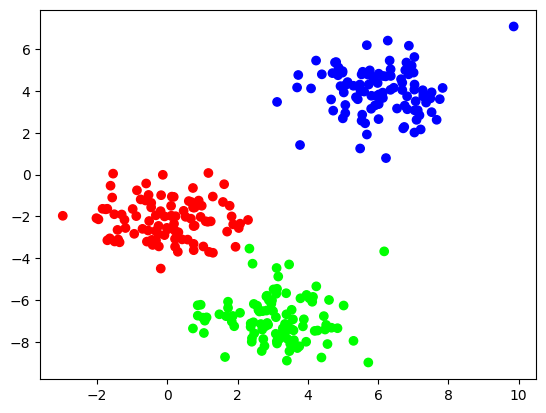

In [101]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [102]:
def softmax(X):
    sum_exp = np.sum(np.exp(X), axis = 0)
    return np.exp(X) / sum_exp

def softmax_optimal(X):
    opt_exp = np.exp(X) - np.max(X, axis = 0, keepdims = True)
    return opt_exp / opt_exp.sum(axis = 0)

softmax(X_train)

array([[5.64162622e-06, 7.51630714e-05],
       [1.02819357e-04, 4.14523096e-05],
       [8.65964326e-05, 8.92283199e-05],
       [4.04925296e-05, 1.83006450e-05],
       [2.68547309e-05, 6.88535014e-05],
       [2.05304849e-05, 8.24459662e-05],
       [1.81078000e-05, 1.20762609e-04],
       [6.36028728e-05, 4.80656840e-05],
       [1.90803204e-05, 1.49412707e-04],
       [2.09429529e-05, 1.74381684e-05],
       [1.63844776e-04, 2.49282006e-04],
       [2.52306290e-05, 2.29781531e-05],
       [3.90349159e-05, 1.36191480e-04],
       [6.74197618e-05, 2.08207621e-04],
       [2.34225627e-05, 5.64105191e-05],
       [4.05419582e-05, 1.26008294e-05],
       [1.52348494e-05, 1.20715151e-04],
       [6.87435281e-05, 3.38193359e-05],
       [1.06650817e-04, 9.83908589e-06],
       [8.36067182e-06, 1.55575355e-05],
       [1.88308912e-05, 2.73524991e-05],
       [3.26959886e-05, 2.89057605e-05],
       [1.19066946e-04, 9.42988604e-06],
       [1.21414805e-05, 7.62858439e-05],
       [6.464717

In [103]:
class SoftmaxRegression:
    def __init__(self, max_iterations=1000, learning_rate=.01):
        self.max_iterations = max_iterations
        self.lr = learning_rate
        
        self.weight = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        _, n_class = y.shape
        data_set = np.c_[X, [1] * n_samples]
        n_features += 1
        
        self.weight = np.random.randn(n_features, n_class)
        loss = 0
        
        for ite in range(self.max_iterations + 1):
            Z = self.weight.T @ data_set.T
            y_hat = softmax(Z)
            E = y_hat - y.T
            
            dW = data_set.T @ E.T
            self.weight -= self.lr * dW
            
            loss = -np.tensordot(y.T, np.log(y_hat))
            if ite % 100 == 0:
                print(f"Iteration {ite}, loss metrics: {loss}")
                
    def predict(self, X):
        
        data = np.c_[X, [1] * X.shape[0]]
        Z = self.weight.T @ data.T
        y_hat = softmax(Z)
        return np.argmax(y_hat, axis = 0, keepdims = True)
        

In [115]:
SR = SoftmaxRegression()

SR.fit(X_train, y_train)

Iteration 0, loss metrics: 882.4368139530114
Iteration 100, loss metrics: 3.7802638277024188
Iteration 200, loss metrics: 2.961115867897716
Iteration 300, loss metrics: 2.5366243872998835
Iteration 400, loss metrics: 2.26615486947435
Iteration 500, loss metrics: 2.074267061200418
Iteration 600, loss metrics: 1.9287406676352878
Iteration 700, loss metrics: 1.8132446932177464
Iteration 800, loss metrics: 1.718516959297311
Iteration 900, loss metrics: 1.638865956312792
Iteration 1000, loss metrics: 1.5705770533387238


In [116]:
SR.predict(X_test)

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], dtype=int64)

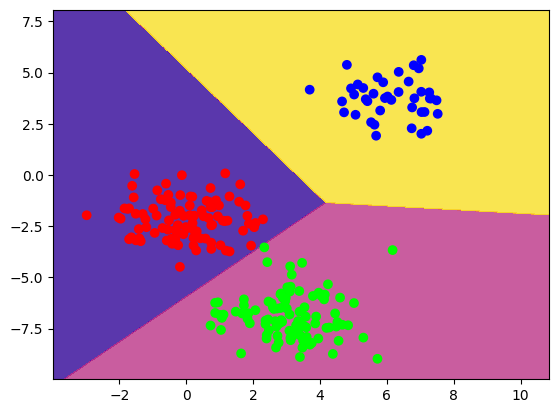

In [117]:
X_max, X_min = X[:, 0].max() + 1, X[:, 0].min() - 1
y_max, y_min = X[:, 1].max() + 1, X[:, 1].min() - 1

xx, yy = np.meshgrid(np.arange(X_min, X_max, .01), np.arange(y_min, y_max, .01))

Z = SR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, cmap="viridis", alpha=.8)
plt.contourf(xx, yy, Z, cmap="plasma", alpha=.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
